In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate as integrate
import matplotlib
matplotlib.rc('xtick', labelsize=23) 
matplotlib.rc('ytick', labelsize=23) 

The macro-magntifications mu are 1/[(1 - kappa)^2 - gamma^2] <br>
<br>
So the macro-predictions are -2.5log(mu) + unmagnified apparent magnitude of quasar. <br>
<br>
  A          B         C        D <br>
 1.03E-01  1.68E+00  2.86E+00  3.11E+00<br>
  min        min      saddle    saddle   3 mag <=> factor of 16.<br>
<br>
If A were magnitfied by 12.6936, D would be magnified by<br>
less than 1, meaning no micro-minima.  Same story for C.<br>
But A is probably micro-magnified.<br>
<br>
<br>
Here are kappas and gammas for its four images:<br>
        x             y           kappa         gamma<br>
 A -1.934633e-03  2.842221e-03  4.747815e-01  4.439307e-01  1.327487e+01<br>
 B -4.226144e-02 -1.804457e+00  4.259092e-01  3.893498e-01 -1.390233e+01<br>
 C  9.607647e-01 -6.935695e-01  5.720462e-01  6.038433e-01 -7.918971e+01<br>
 D -5.425104e-01 -4.143636e-01  5.331661e-01  5.572576e-01  6.000388e+01<br>

Stellar fraction — do (.1,.2,.5 and 1) or (.1, .3, 1)
_____
______


0_ signifies kappa_star / kappa_tot = 0.01 * (10^0.1)^0 = 0.01 <br>
1_ signifies kappa_star / kappa_tot = 0.01 * (10^0.1)^1 <br>
2_ signifies kappa_star / kappa_tot = 0.01 * (10^0.1)^2 <br>
... <br>
10_ signifies kappa_star / kappa_tot = 0.01 * (10^0.1)^10 = 0.1 <br>
... <br>
20_ signifies kappa_star / kappa_tot = 0.01 * (10^0.1)^20 = 1

<br>
<br>
10% ~ 0.01 * (10^0.1)^10 = 0.1000 <br>
20% ~ 0.01 * (10^0.1)^13 = 0.1995 <br>
30% ~ 0.01 * (10^0.1)^15 = 0.3162 <br>
50% ~ 0.01 * (10^0.1)^17 = 0.5012 <br>
100% ~ 0.01 * (10^0.1)^20 = 1.000 <br>

In [2]:
filenames = [
'15_col1_numminima_col2_numrays_col3_counts.txt'
]


foldernames = [
'kappa_0.474782_gamma_0.443931',
'kappa_0.425909_gamma_0.38935',
'kappa_0.572046_gamma_0.603843',
'kappa_0.533166_gamma_0.557258'
]

## import data

In [8]:
data_zero = [[], [], [], []]
data_all = [[], [], [], []]

for ii in range(0, len(foldernames)):
    folder = foldernames[ii]
    for jj in range(0, len(filenames)):
        file = filenames[jj]
        dataset = pd.read_csv('sim_files/' + folder + '/' + file, dtype = int, delimiter = ' ', header = None)
        dataset.columns = ['micro-minima', 'number of rays', 'count']
        
        data_zero[ii] = dataset[dataset['micro-minima'] == 0]
        summed_rays = dataset.groupby('number of rays')['count'].sum()
        data_all[ii] = pd.DataFrame({'number of rays':summed_rays.index, 'count':summed_rays.values})

        
  


In [9]:
def find_mag_zero_point(dataset):
    nrays = dataset['number of rays']
    pixels = dataset['count']
    avg = np.sum(nrays*pixels) / np.sum(pixels)
    #avg = np.average(nrays, weights = pixels)
    print(avg)
    return -2.5*np.log10(avg)

In [12]:
for ii in range(0, 4):
    print(find_mag_zero_point(data_all[ii]))

1032.207545375
-7.534417573530118
1017.6827494375
-7.519031032324756
989.9053816875
-7.488984213325174
934.1365139375
-7.426025870761136


#### make sure that the 6 datasets each have the same minimum and maximum value in "number of rays" space so that when we switch to magnitude space the distributions are spaced correctly

In [13]:

min_rays = np.inf
max_rays = -np.inf
for dataset in data_all:
    if np.min(dataset['number of rays']) < min_rays:
        min_rays = np.min(dataset['number of rays'])
    
    if np.max(dataset['number of rays']) > max_rays:
        max_rays = np.max(dataset['number of rays'])
        
print(min_rays, max_rays)
nrays_array = np.arange(min_rays,max_rays+1,1)
for ii in range(0, len(data_all)):
    dataset = data_all[ii]
    print(np.min(dataset['number of rays']), np.max(dataset['number of rays']))
    for nrays in nrays_array:
        if nrays not in dataset['number of rays']:
            data_all[ii] = data_all[ii].append(pd.DataFrame({'number of rays':[nrays], 'count':[0]}))
            

for ii in range(2, len(data_zero)):
    dataset = data_zero[ii]
    print(np.min(dataset['number of rays']), np.max(dataset['number of rays']))
    for nrays in nrays_array:
        if nrays not in dataset['number of rays']:
            data_zero[ii] = data_zero[ii].append(pd.DataFrame({'number of rays':[nrays], 'count':[0]}))
            


46 68637
220 22688
405 33556
59 68637
46 40747
59 49824


/Users/Danielyahalomi/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


46 32802


#### make an initial plot of our data in number of rays vs. count space

Maybe the best way to think about this is to consider 0 for D (all for 
the rest) and all for D (and the rest) and just take the ratio.
Likewise 0 and all for C.  And finally 0 for C *and* 0 for D and all for
the A&B and then simply all and again take the ratio.  Altogether
4 cases:  uno) 0 for D  dos: 0 for C tres:  0 for both quatro:  All.
uno/quatro gives probability that D is in the ground state.  Likewise
duo/quatro.  And tres/quatro gives the probability that both are.

let's plot these 4 combinations in # of pixel vs. count space

------
-------

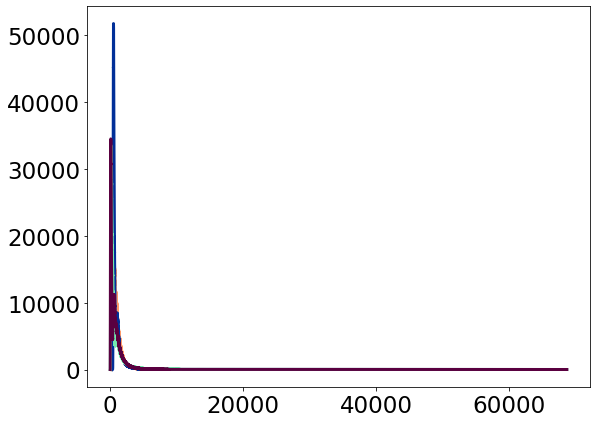

In [14]:
colors = ['#ff9967', '#012f98', '#73eaaf', '#5a0040']
fig, ax = plt.subplots(1, figsize = [9,7])


ax.plot(data_all[0]['number of rays'], data_all[0]['count'], linewidth = 3, color = colors[0], linestyle = 'solid')
ax.plot(data_all[1]['number of rays'], data_all[1]['count'], linewidth = 3, color = colors[1], linestyle = 'solid')
ax.plot(data_all[2]['number of rays'], data_all[2]['count'], linewidth = 3, color = colors[2], linestyle = 'solid')
ax.plot(data_all[3]['number of rays'], data_all[3]['count'], linewidth = 3, color = colors[3], linestyle = 'solid')

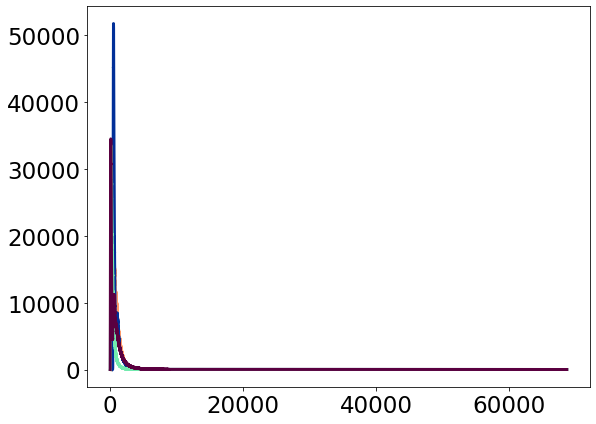

In [15]:
colors = ['#ff9967', '#012f98', '#73eaaf', '#5a0040']
fig, ax = plt.subplots(1, figsize = [9,7])


ax.plot(data_all[0]['number of rays'], data_all[0]['count'], linewidth = 3, color = colors[0], linestyle = 'solid')
ax.plot(data_all[1]['number of rays'], data_all[1]['count'], linewidth = 3, color = colors[1], linestyle = 'solid')
ax.plot(data_zero[2]['number of rays'], data_zero[2]['count'], linewidth = 3, color = colors[2], linestyle = 'solid')
ax.plot(data_all[3]['number of rays'], data_all[3]['count'], linewidth = 3, color = colors[3], linestyle = 'solid')


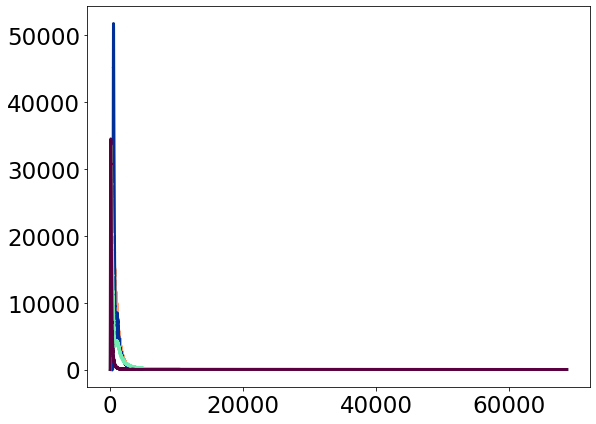

In [16]:
colors = ['#ff9967', '#012f98', '#73eaaf', '#5a0040']
fig, ax = plt.subplots(1, figsize = [9,7])


ax.plot(data_all[0]['number of rays'], data_all[0]['count'], linewidth = 3, color = colors[0], linestyle = 'solid')
ax.plot(data_all[1]['number of rays'], data_all[1]['count'], linewidth = 3, color = colors[1], linestyle = 'solid')
ax.plot(data_all[2]['number of rays'], data_all[2]['count'], linewidth = 3, color = colors[2], linestyle = 'solid')
ax.plot(data_zero[3]['number of rays'], data_zero[3]['count'], linewidth = 3, color = colors[3], linestyle = 'solid')

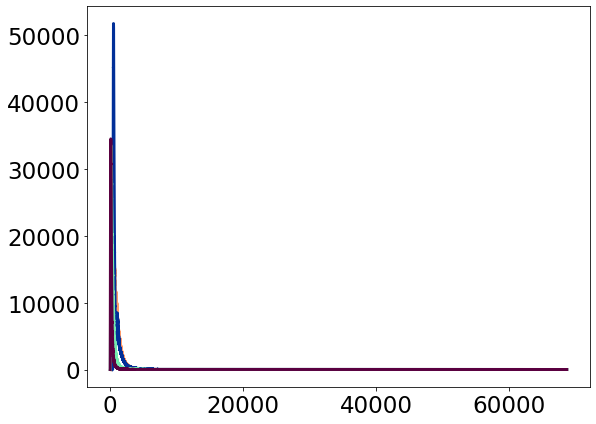

In [17]:
colors = ['#ff9967', '#012f98', '#73eaaf', '#5a0040']
fig, ax = plt.subplots(1, figsize = [9,7])


ax.plot(data_all[0]['number of rays'], data_all[0]['count'], linewidth = 3, color = colors[0], linestyle = 'solid')
ax.plot(data_all[1]['number of rays'], data_all[1]['count'], linewidth = 3, color = colors[1], linestyle = 'solid')
ax.plot(data_zero[2]['number of rays'], data_zero[2]['count'], linewidth = 3, color = colors[2], linestyle = 'solid')
ax.plot(data_zero[3]['number of rays'], data_zero[3]['count'], linewidth = 3, color = colors[3], linestyle = 'solid')

### these plots don't really tell us much, as we must convert to magnitude space and normalize the data

#### let's do that!

From Luke Weisenbach: <br>
The mean number of rays per pixel = 1000 is exact and is what one would get given the ray density in the image plane if all the matter was smooth. The simulated mean will fluctuate around that a bit due to using a finite field of stars/finite source plane region. Use 1000 for calibrating magnifications

In [18]:
# data_mag_all will contain magnitude pdf's for image A,B,C,D at 30% stellar for case with all # micro-minima
data_zero_points = []

for dataset in data_all:
    dataset_zero = -2.5*np.log10(1000)
    data_zero_points.append(dataset_zero)
    
print(data_zero_points)

[-7.5, -7.5, -7.5, -7.5]


In [19]:
#returns the nearest element in an array from a given value
def find_nearest(array, value):
    index = (np.abs(array - value)).argmin()
    return array[index]

In [24]:
#this is a complicated function, but the fundamental goal here is to convert to magnitude space
#it get's complicated because we must "bin" in magnitude space practically as we have integer
#steps in number of rays space. these integer steps won't translate perfectly to the magnitude
#space bins. so, in order convert to magnitude space, we setup our magnitude bins and step through the
#number of rays space, and divide the proportion of the number of rays into the relevant bins by the proportion
#of the bin that it covers

def bin_to_magnitude_space_all(dataset, binsize_mag = 1./256.):
    nrays_array = dataset['number of rays'].values
    count_array = dataset['count'].values
    mag_zero_point = -2.5*np.log10(1000)
    print(mag_zero_point)
    
    #initialize the output pandas dataframe
    dataset_mag = pd.DataFrame(columns = ['magnitude', 'count'])
    
    nrays_min = nrays_array.min()
    nrays_max = nrays_array.max()
    mag_min = -2.5*np.log10(nrays_max)
    mag_max = -2.5*np.log10(nrays_min)

    #define magnitude bins
    mag_bins = np.arange(mag_min, mag_max, binsize_mag)
    for mag in mag_bins:        
        dataset_mag.loc[len(dataset_mag.index)] = [mag, 0]
    
    
    #step through number of rays (integer) space
    for ii in range(0, len(nrays_array)):
        count = count_array[ii]

        
        #determine the middle, left, and right location of the current number of rays bin
        nrays_middle = nrays_array[ii]
        nrays_left = nrays_array[ii]-0.5
        nrays_right = nrays_array[ii]+0.5
        
        #convert this to magnitude space
        int_middle = -2.5*np.log10(nrays_middle)
        int_left = -2.5*np.log10(nrays_left)
        int_right = -2.5*np.log10(nrays_right)
        
        
        #find the nearest magnitude bin that corresponds to the middle of the number of rays in mag space
        #define the left and right cutoff for several bins to the left and right in case of spillover
        mag_middle = find_nearest(mag_bins, int_middle)
        mag_left = mag_middle + (binsize_mag/2.)
        next1_mag_left = mag_middle + (3*binsize_mag/2.)
        next2_mag_left = mag_middle + (5*binsize_mag/2.)
        next3_mag_left = mag_middle + (7*binsize_mag/2.)
        
        mag_right = mag_middle - (binsize_mag/2.)
        next1_mag_right = mag_middle - (3*binsize_mag/2.)
        next2_mag_right = mag_middle - (5*binsize_mag/2.)
        next3_mag_right = mag_middle - (7*binsize_mag/2.)
            
        
        #determine the fraction of the count to be placed in the each magnitude bin
        frac_next2_left, frac_next1_left, frac_left, frac_middle, frac_right, frac_next1_right, frac_next2_right = None, None, None, None, None, None, None
        if int_left - mag_middle > mag_left - mag_middle:
            if int_right - mag_middle < mag_right - mag_middle:
                frac_middle = 1
            if int_left - mag_middle > next1_mag_left - mag_middle:
                if int_left - mag_middle > next2_mag_left - mag_middle:
                    frac_next2_left = ((int_left-next2_mag_left)/(next3_mag_left-next2_mag_left))
                    frac_next1_left = 1
                    frac_left = 1
                
                else:
                    frac_next1_left = ((int_left-next1_mag_left)/(next2_mag_left-next1_mag_left))
                    frac_left = 1
                    
            else:
                frac_left = ((int_left-mag_left)/(next1_mag_left-mag_left))
                
            if int_right - mag_middle > mag_right - mag_middle:
                frac_middle = ((int_right-mag_left)/(mag_right-mag_left))
            
            
                    
                    
        if int_right - mag_middle < mag_right - mag_middle:
            if int_right - mag_middle < next1_mag_right - mag_middle:
                if int_right - mag_middle < next2_mag_right - mag_middle:
                    frac_next2_right = ((int_right-next2_mag_right)/(next3_mag_right-next2_mag_right))
                    frac_next1_right = 1
                    frac_right = 1
                
                else:
                    frac_next1_right = ((int_right-next1_mag_right)/(next2_mag_right-next1_mag_right))
                    frac_right = 1
                        
            else:
                frac_right = ((int_right-mag_right)/(next1_mag_right-mag_right))
                              
            if int_left - mag_middle < mag_left - mag_middle:
                frac_middle = ((int_left-mag_right)/(mag_left-mag_right))
                
        elif int_left - mag_middle < mag_left - mag_middle:
            frac_middle = ((int_left-int_right)/(mag_left-mag_right))
            

            
        if frac_next2_left == None:
            frac_next2_left = 0
            
        if frac_next1_left == None:
            frac_next1_left = 0
        
        if frac_left == None:
            frac_left = 0
        
        if frac_right == None:
            frac_right = 0
        
        if frac_next1_right == None:
            frac_next1_right = 0
        
        if frac_next2_right == None:
            frac_next2_right = 0
            
            
    
        #make an array of the proportion of the count per bin
        proportions = np.array([frac_next2_left, frac_next1_left, frac_left, frac_middle, frac_right, frac_next1_right, frac_next2_right]) 
        
        #if true, you need another bin in magnitude space
        if proportions.any() > 1:
            print("error, fraction greater than 1!")
        
        
        total = np.sum(proportions)
        proportions = proportions/total        

        counts_per_bin = count*proportions
        
        #make our output pandas dataframe
        dataset_mag.loc[dataset_mag.magnitude == mag_middle+3*binsize_mag, 'count'] += counts_per_bin[0]
        dataset_mag.loc[dataset_mag.magnitude == mag_middle+2*binsize_mag, 'count'] += counts_per_bin[1]
        dataset_mag.loc[dataset_mag.magnitude == mag_middle+binsize_mag, 'count'] += counts_per_bin[2]

        dataset_mag.loc[dataset_mag.magnitude == mag_middle, 'count'] += counts_per_bin[3]

        dataset_mag.loc[dataset_mag.magnitude == mag_middle-binsize_mag, 'count'] += counts_per_bin[4]
        dataset_mag.loc[dataset_mag.magnitude == mag_middle-2*binsize_mag, 'count'] += counts_per_bin[5]
        dataset_mag.loc[dataset_mag.magnitude == mag_middle-3*binsize_mag, 'count'] += counts_per_bin[6]
        
        
        dataset_mag['normalized count'] = dataset_mag['count'] / integrate.simps(dataset_mag['count'], x = dataset_mag['magnitude'])
        dataset_mag['shifted magnitude'] = dataset_mag['magnitude'] - mag_zero_point
        
        normalization = integrate.simps(dataset_mag['count'], x = dataset_mag['magnitude'])


    return dataset_mag, normalization
            
            
            

        
        

## below takes a lot of time to run --> skip if not needed

In [26]:
# data_mag_all will contain magnitude pdf's for image A,B,C,D at 30% stellar for case with all # micro-minima
data_mag_all = []
normalization_all = []

for dataset in data_all:
    dataset_mag = bin_to_magnitude_space_all(dataset, binsize_mag = 1./256.)
    data_mag_all.append(dataset_mag[0])
    normalization_all.append(dataset_mag[1])


-7.5
-7.5
-7.5
-7.5


In [28]:
#this is a complicated function, but the fundamental goal here is to convert to magnitude space
#it get's complicated because we must "bin" in magnitude space practically as we have integer
#steps in number of rays space. these integer steps won't translate perfectly to the magnitude
#space bins. so, in order convert to magnitude space, we setup our magnitude bins and step through the
#number of rays space, and divide the proportion of the number of rays into the relevant bins by the proportion
#of the bin that it covers

def bin_to_magnitude_space_zero(dataset, normalization, binsize_mag = 1./256.):
    nrays_array = dataset['number of rays'].values
    count_array = dataset['count'].values
    mag_zero_point = -2.5*np.log10(1000)
    print(mag_zero_point)
    
    #initialize the output pandas dataframe
    dataset_mag = pd.DataFrame(columns = ['magnitude', 'count'])
    
    nrays_min = nrays_array.min()
    nrays_max = nrays_array.max()
    mag_min = -2.5*np.log10(nrays_max)
    mag_max = -2.5*np.log10(nrays_min)

    #define magnitude bins
    mag_bins = np.arange(mag_min, mag_max, binsize_mag)
    for mag in mag_bins:        
        dataset_mag.loc[len(dataset_mag.index)] = [mag, 0]
    
    
    #step through number of rays (integer) space
    for ii in range(0, len(nrays_array)):
        count = count_array[ii]

        
        #determine the middle, left, and right location of the current number of rays bin
        nrays_middle = nrays_array[ii]
        nrays_left = nrays_array[ii]-0.5
        nrays_right = nrays_array[ii]+0.5
        
        #convert this to magnitude space
        int_middle = -2.5*np.log10(nrays_middle)
        int_left = -2.5*np.log10(nrays_left)
        int_right = -2.5*np.log10(nrays_right)
        
        
        #find the nearest magnitude bin that corresponds to the middle of the number of rays in mag space
        #define the left and right cutoff for several bins to the left and right in case of spillover
        mag_middle = find_nearest(mag_bins, int_middle)
        mag_left = mag_middle + (binsize_mag/2.)
        next1_mag_left = mag_middle + (3*binsize_mag/2.)
        next2_mag_left = mag_middle + (5*binsize_mag/2.)
        next3_mag_left = mag_middle + (7*binsize_mag/2.)
        
        mag_right = mag_middle - (binsize_mag/2.)
        next1_mag_right = mag_middle - (3*binsize_mag/2.)
        next2_mag_right = mag_middle - (5*binsize_mag/2.)
        next3_mag_right = mag_middle - (7*binsize_mag/2.)
            
        
        #determine the fraction of the count to be placed in the each magnitude bin
        frac_next2_left, frac_next1_left, frac_left, frac_middle, frac_right, frac_next1_right, frac_next2_right = None, None, None, None, None, None, None
        if int_left - mag_middle > mag_left - mag_middle:
            if int_right - mag_middle < mag_right - mag_middle:
                frac_middle = 1
            if int_left - mag_middle > next1_mag_left - mag_middle:
                if int_left - mag_middle > next2_mag_left - mag_middle:
                    frac_next2_left = ((int_left-next2_mag_left)/(next3_mag_left-next2_mag_left))
                    frac_next1_left = 1
                    frac_left = 1
                
                else:
                    frac_next1_left = ((int_left-next1_mag_left)/(next2_mag_left-next1_mag_left))
                    frac_left = 1
                    
            else:
                frac_left = ((int_left-mag_left)/(next1_mag_left-mag_left))
                
            if int_right - mag_middle > mag_right - mag_middle:
                frac_middle = ((int_right-mag_left)/(mag_right-mag_left))
            
            
                    
                    
        if int_right - mag_middle < mag_right - mag_middle:
            if int_right - mag_middle < next1_mag_right - mag_middle:
                if int_right - mag_middle < next2_mag_right - mag_middle:
                    frac_next2_right = ((int_right-next2_mag_right)/(next3_mag_right-next2_mag_right))
                    frac_next1_right = 1
                    frac_right = 1
                
                else:
                    frac_next1_right = ((int_right-next1_mag_right)/(next2_mag_right-next1_mag_right))
                    frac_right = 1
                        
            else:
                frac_right = ((int_right-mag_right)/(next1_mag_right-mag_right))
                              
            if int_left - mag_middle < mag_left - mag_middle:
                frac_middle = ((int_left-mag_right)/(mag_left-mag_right))
                
        elif int_left - mag_middle < mag_left - mag_middle:
            frac_middle = ((int_left-int_right)/(mag_left-mag_right))
            

            
        if frac_next2_left == None:
            frac_next2_left = 0
            
        if frac_next1_left == None:
            frac_next1_left = 0
        
        if frac_left == None:
            frac_left = 0
        
        if frac_right == None:
            frac_right = 0
        
        if frac_next1_right == None:
            frac_next1_right = 0
        
        if frac_next2_right == None:
            frac_next2_right = 0
            
            
    
        #make an array of the proportion of the count per bin
        proportions = np.array([frac_next2_left, frac_next1_left, frac_left, frac_middle, frac_right, frac_next1_right, frac_next2_right]) 
        
        #if true, you need another bin in magnitude space
        if proportions.any() > 1:
            print("error, fraction greater than 1!")
        
        
        total = np.sum(proportions)
        proportions = proportions/total        

        counts_per_bin = count*proportions
        
        #make our output pandas dataframe
        dataset_mag.loc[dataset_mag.magnitude == mag_middle+3*binsize_mag, 'count'] += counts_per_bin[0]
        dataset_mag.loc[dataset_mag.magnitude == mag_middle+2*binsize_mag, 'count'] += counts_per_bin[1]
        dataset_mag.loc[dataset_mag.magnitude == mag_middle+binsize_mag, 'count'] += counts_per_bin[2]

        dataset_mag.loc[dataset_mag.magnitude == mag_middle, 'count'] += counts_per_bin[3]

        dataset_mag.loc[dataset_mag.magnitude == mag_middle-binsize_mag, 'count'] += counts_per_bin[4]
        dataset_mag.loc[dataset_mag.magnitude == mag_middle-2*binsize_mag, 'count'] += counts_per_bin[5]
        dataset_mag.loc[dataset_mag.magnitude == mag_middle-3*binsize_mag, 'count'] += counts_per_bin[6]
        
        
        dataset_mag['normalized count'] = dataset_mag['count'] / normalization
        dataset_mag['shifted magnitude'] = dataset_mag['magnitude'] - mag_zero_point
        


    return dataset_mag

## below takes a lot of time to run --> skip if not needed

In [29]:
#data_mag_zero will contain magnitude pdf's for image C,D at 30% stellar for case with only zero micro-minima
data_mag_zero = []
print(normalization_all)
    
for ii in range(2, len(data_zero)):
    dataset = data_zero[ii]
    norm = normalization_all[ii]
    print(norm)
    dataset_mag = bin_to_magnitude_space_zero(dataset, norm, binsize_mag = 1./256.)
    data_mag_zero.append(dataset_mag)   

[62504.13259756738, 62498.131411247596, 62498.783692611316, 62499.99788609218]
62498.783692611316
-7.5
62499.99788609218
-7.5


In [30]:
a = [1,2,3,4]
print(a[2:4])

[3, 4]


### save the magnitude space data

In [31]:
all_filenames = ['a_all_stellar_30_may14', 'b_all_stellar_30_may14', 'c_all_stellar_30_may14', 'd_all_stellar_30_may14']

for ii in range(0, len(data_mag_all)):
    dataset = data_mag_all[ii]
    filename = all_filenames[ii]
    dataset.to_csv('./sim_data_magnitude/' + filename, index=False)
    
    
zero_filenames = ['c_zero_stellar_30_may14', 'd_zero_stellar_30_may14']

for ii in range(0, len(data_mag_zero)):
    dataset = data_mag_zero[ii]
    filename = zero_filenames[ii]
    dataset.to_csv('./sim_data_magnitude/' + filename, index=False)

In [ ]:
###import data not as a pandas dataset

micro_min = []
nrays = []
pixels = []

for ii in range(0, len(foldernames)):
    folder = foldernames[ii]
    for jj in range(0, len(filenames)):
        file = filenames[jj]
        dataset = np.loadtxt('sim_files/' + folder + '/' + file, dtype = int, delimiter = ' ')
        
        micro_min.append(dataset[:,0])
        nrays.append(dataset[:,1])
        pixels.append(dataset[:,2])
        

nrays_zero = []
pixels_zero = []

data_all = [{},{},{},{}]
for ii in range(0, 4):
    for jj in range(0,len(micro_min[ii])):
        data_all[ii][nrays[ii][jj]] = 0
        

for ii in range(0, 4):
    for jj in range(0,len(micro_min[ii])):
        if micro_min[ii][jj] == 0:
            nrays_zero.append(nrays[ii][jj])
            pixels_zero.append(pixels[ii][jj])
            
        
        data_all[ii][nrays[ii][jj]] += pixels[ii][jj]
        
            
        
nrays_all = []
pixels_all = []
for dataset in data_all:
    nrays_all.append(np.array(list(dataset.keys())))
    pixels_all.append(np.array(list(dataset.values())))